In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [103]:
MyData = pd.read_csv("../Downloads/Income_Expense_Data.csv")

In [104]:
MyData.shape

(20, 3)

In [105]:
MyData.head(10)

,Age,Income,Expense
0,51,32751,21705
1,27,25730,15000
2,32,33410,20000
3,56,40286,25000
4,225,47165,40000
5,35,30000,18000
6,45,35000,20000
7,28,28000,16000
8,60,45000,28000
9,40,38000,22000


# Data Cleaning

In [106]:
MyData.isnull().sum() 

Age        0
Income     0
Expense    0
dtype: int64

In [107]:
MyData["Income"].fillna((MyData["Income"].median()), inplace = True)

In [108]:
MyData.isnull().sum() 

Age        0
Income     0
Expense    0
dtype: int64

In [109]:
#Checking for outliers
MyData.describe()  

,Age,Income,Expense
count,20.000000,20.000,20.000000
mean,50.550000,36967.100,22135.250000
std,42.808601,8745.099,6277.449925
min,22.000000,25000.000,15000.000000
25%,31.500000,29750.000,17750.000000
50%,41.000000,35500.000,20852.500000
75%,52.000000,42750.000,25000.000000
max,225.000000,55000.000,40000.000000


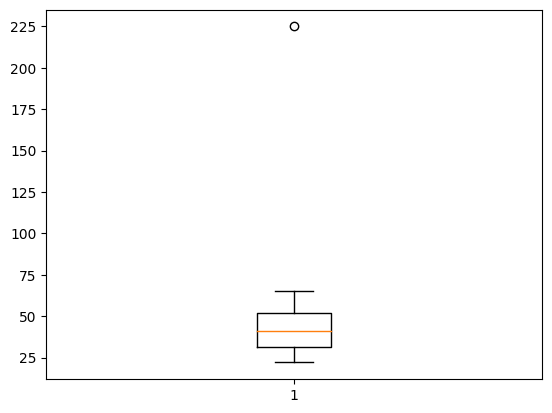

In [110]:
#checking boxplot for Age column
plt.boxplot(MyData['Age'])
plt.show()

In [111]:
#getting median Age
Age_col_df = pd.DataFrame(MyData['Age'])
Age_median = Age_col_df.median()

#getting IQR of Age column
Q3 = Age_col_df.quantile(q=0.75)
Q1 = Age_col_df.quantile(q=0.25)
IQR = Q3-Q1

#Deriving boundaries of Outliers
IQR_LL = int(Q1 - 1.5*IQR)
IQR_UL = int(Q3 + 1.5*IQR)

#Finding and treating outliers - both lower and upper end
MyData.loc[MyData['Age']>IQR_UL , 'Age'] = int(Age_col_df.quantile(q=0.90))
MyData.loc[MyData['Age']<IQR_LL , 'Age'] = int(Age_col_df.quantile(q=0.01))

C:\Users\KASYAP KRISHNA\AppData\Local\Temp\ipykernel_11896\2778231966.py:11: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  IQR_LL = int(Q1 - 1.5*IQR)
C:\Users\KASYAP KRISHNA\AppData\Local\Temp\ipykernel_11896\2778231966.py:12: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  IQR_UL = int(Q3 + 1.5*IQR)
C:\Users\KASYAP KRISHNA\AppData\Local\Temp\ipykernel_11896\2778231966.py:15: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  MyData.loc[MyData['Age']>IQR_UL , 'Age'] = int(Age_col_df.quantile(q=0.90))
C:\Users\KASYAP KRISHNA\AppData\Local\Temp\ipykernel_11896\2778231966.py:16: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead


In [112]:
#Check max age value now
max(MyData['Age'])

65

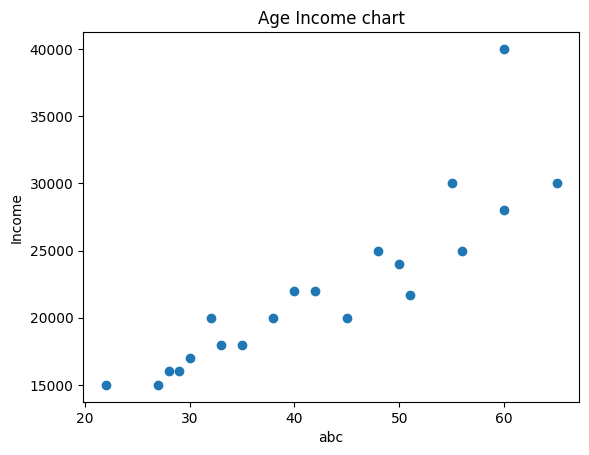

In [113]:
#Check how Expense is varying with Age
x = MyData["Age"]
y=  MyData["Expense"]
plt.scatter(x, y)
plt.title('Age Income chart')
plt.xlabel('abc')
plt.ylabel('Income')
plt.show()

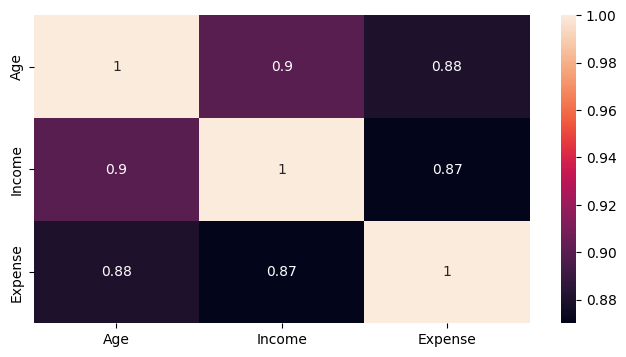

In [114]:
#check correltion matrix - to check the strength of variation bwtween two variables
correlation_matrix= MyData.corr().round(2)
fgr, ax = plt.subplots(figsize =(8, 4)) 
c = sns.heatmap(data=correlation_matrix, annot=True)

# Feature engineering

In [115]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(MyData)
scaled_data

array([[0.6744186 , 0.25836667, 0.2682    ],
       [0.11627907, 0.02433333, 0.        ],
       [0.23255814, 0.28033333, 0.2       ],
       [0.79069767, 0.50953333, 0.4       ],
       [0.88372093, 0.73883333, 1.        ],
       [0.30232558, 0.16666667, 0.12      ],
       [0.53488372, 0.33333333, 0.2       ],
       [0.13953488, 0.1       , 0.04      ],
       [0.88372093, 0.66666667, 0.52      ],
       [0.41860465, 0.43333333, 0.28      ],
       [0.25581395, 0.23333333, 0.12      ],
       [0.76744186, 0.83333333, 0.6       ],
       [0.60465116, 0.56666667, 0.4       ],
       [0.        , 0.        , 0.        ],
       [0.1627907 , 0.06666667, 0.04      ],
       [0.46511628, 0.5       , 0.28      ],
       [0.37209302, 0.36666667, 0.2       ],
       [0.65116279, 0.76666667, 0.36      ],
       [1.        , 1.        , 0.6       ],
       [0.18604651, 0.13333333, 0.08      ]])

In [116]:
#converting data back to pandas dataframe
MyData_scaled = pd.DataFrame(scaled_data)
MyData_scaled.columns = MyData.columns

In [117]:
#Separating features and response
features = ["Income","Age"]
response = ["Expense"]
X=MyData_scaled[features]
y=MyData_scaled[response]

In [118]:
#Dividing data in test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [120]:
X_test #the test data - predictors

,Income,Age
18,1.000000,1.000000
1,0.024333,0.116279


In [121]:
y_test #the actual values in test data - target column

,Expense
18,0.6
1,0.0


In [122]:
y_pred

array([[ 0.77156876],
       [-0.01653251]])

In [123]:
#Checking accuracy on test data
accuracy = model.score(X_test,y_test)
print(accuracy*100,'%')

83.49490951046427 %


In [130]:
# checking accuracy on predicted data

y_pred = model.predict(X_test)

metrics.r2_score(y_pred,y_test)*100

90.43342776059417

# End

# 

# 

# 

# 

### Feature selection using f_classif does not select any feature

In [124]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

In [125]:
df = pd.DataFrame(MyData)

x = MyData.values
y = MyData['Expense']

x = x.astype(int)

In [126]:
chi2_selector = SelectPercentile(chi2)
kBest = chi2_selector.fit_transform(x,y)

In [127]:
chi2_scores = pd.DataFrame(list(zip(df.columns, chi2_selector.scores_)), columns=['feature','score'])
chi2_scores

,feature,score
0,Age,69.279748
1,Income,38707.687623
2,Expense,33824.834766


In [128]:
print(f"Original features are {x.shape[1]}")
print(f"Number of reduced features {kBest.shape[1]}")

Original features are 3
Number of reduced features 1


In [129]:
np.asarray(MyData.columns)[chi2_selector.get_support()]

array(['Income'], dtype=object)